In [18]:
from skimage import data,io,filters
from skimage.morphology import disk

import matplotlib.pyplot as plt

from scipy.signal import convolve2d as conv2d
import numpy as np
%matplotlib inline

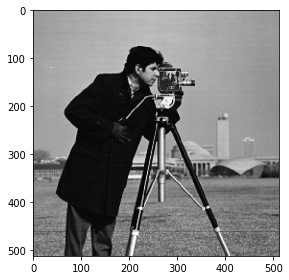

In [3]:
img = data.camera()
io.imshow(img, cmap='gray')

C:\Users\Hp\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


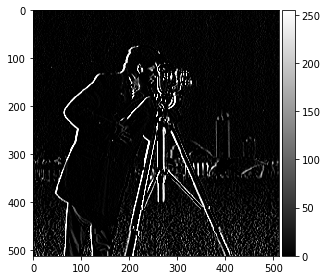

In [7]:
sobel_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

img_sobel = conv2d(img, sobel_kernel, mode='same')
img_sobel = np.clip(img_sobel, 0, 255)
io.imshow(img_sobel, cmap='gray')

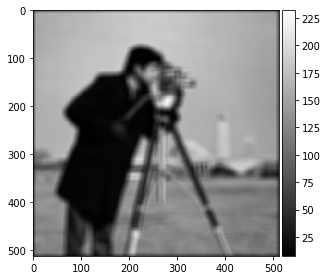

In [12]:
size = 15
mean_kernel = np.ones((size,size)) / (size*size)
img_mean = conv2d(img, mean_kernel, mode='same')
img_mean = np.clip(img_mean, 0, 255)
io.imshow(img_mean, cmap='gray')

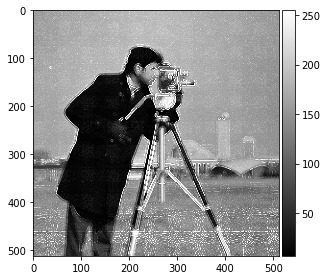

In [14]:
laplacian_kernel = np.array([
    [0,  1, 0],
    [1, -4, 1],
    [0,  1, 0],
])
laplacian_img = conv2d(img, laplacian_kernel, mode='same')
laplacian_img = np.clip(laplacian_img, 0, 255)

alpha = 5
enhanced_img = img + alpha * laplacian_img
enhanced_img = np.clip(enhanced_img, 0, 255)
io.imshow(enhanced_img, cmap='gray')

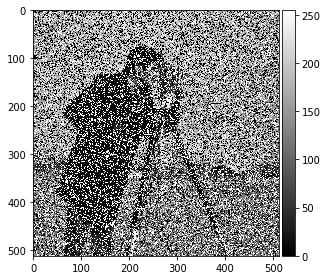

In [22]:
h, w = img.shape
w_noise = np.random.random((h,w))
b_noise = np.random.random((h,w))
w_noise = (w_noise < 0.5) * 9999
b_noise = (b_noise < 0.5) * -9999
noisy_img = img + w_noise + b_noise
noisy_img = np.clip(noisy_img, 0, 255)
io.imshow(noisy_img, cmap='gray')

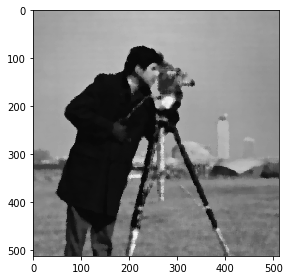

In [26]:
clean_img = filters.median(noisy_img, disk(5))
io.imshow(clean_img, cmap='gray')